In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, minmax_scale
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import sys 
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import np_utils
import tensorflow as tf
#from keras.regularizers import L1L2
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.utils import shuffle
#from keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from featurewiz import featurewiz
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.feature_selection import mutual_info_classif
np.random.seed(19680801)

Imported version = 0.1.70.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                


In [2]:
data = pd.read_csv("data_84.csv")
data.corr()

,cluster,year,n,pct_is_new,pct_is_newish,pct_dusted_ccn,pct_dusted_rmcl,biggest_anc,n_biggest_anc,pct_in_biggest_anc,...,rcr_hi,human,animal,molecular_cellular,is_clinical,is_research_article,cited_by_clin,nih,rage,class
cluster,1.000000,0.037994,-0.565748,-0.074504,-0.110348,NaN,0.167889,0.970928,-0.535347,-0.292716,...,-0.593921,0.147785,-0.105695,-0.219470,-0.131641,0.024460,-0.291785,-0.360423,0.186567,-0.287462
year,0.037994,1.000000,0.255527,-0.076400,-0.090718,NaN,-0.062247,0.032234,0.257807,0.064707,...,0.026724,0.115597,-0.182500,0.022261,0.155194,-0.342872,0.290132,0.145866,0.141452,0.000064
n,-0.565748,0.255527,1.000000,0.000479,0.046986,NaN,-0.163902,-0.529706,0.944779,0.250814,...,0.554896,-0.176251,0.042750,0.310893,0.086510,-0.227096,0.271389,0.493154,-0.297408,0.203125
pct_is_new,-0.074504,-0.076400,0.000479,1.000000,0.977504,NaN,0.324819,-0.067030,0.031434,-0.577600,...,0.578511,0.103644,-0.178666,-0.016157,0.179609,-0.486184,0.106372,0.041895,-0.375163,0.380536
pct_is_newish,-0.110348,-0.090718,0.046986,0.977504,1.000000,NaN,0.296614,-0.087014,0.071423,-0.532598,...,0.594545,0.118009,-0.192315,-0.023968,0.197461,-0.516794,0.135593,0.042045,-0.408149,0.395348
pct_dusted_ccn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pct_dusted_rmcl,0.167889,-0.062247,-0.163902,0.324819,0.296614,NaN,1.000000,0.143202,-0.148498,-0.257728,...,0.064114,0.160536,-0.119093,-0.143087,0.041678,-0.228725,-0.038265,-0.110932,-0.126911,0.024222
biggest_anc,0.970928,0.032234,-0.529706,-0.067030,-0.087014,NaN,0.143202,1.000000,-0.540385,-0.201230,...,-0.576842,0.123883,-0.096861,-0.189442,-0.154197,0.020484,-0.297437,-0.320532,0.176216,-0.273538
n_biggest_anc,-0.535347,0.257807,0.944779,0.031434,0.071423,NaN,-0.148498,-0.540385,1.000000,0.039832,...,0.548927,-0.180580,0.042676,0.315824,0.114279,-0.229948,0.264323,0.482309,-0.309210,0.199221
pct_in_biggest_anc,-0.292716,0.064707,0.250814,-0.577600,-0.532598,NaN,-0.257728,-0.201230,0.039832,1.000000,...,-0.166538,-0.103899,0.117349,0.079256,-0.098682,0.271343,0.040402,0.072045,0.173242,-0.143398


In [3]:
data = pd.read_csv("data_84.csv")
data = data[data['n'] > 100]
d1 = data[data['class'] == 1]
d0 = data[data['class'] == 0]

data2 = pd.read_csv("xx_2020.csv")

data2 = data2[data2['cluster'] != 822]
data2 = data2[data2['cluster'] != 4139]
data2 = data2.drop(['cluster','year','n','pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','prediction'], axis = 1)


data3 = pd.read_csv("xx_2019.csv")

data3 = data3[data3['cluster'] != 1341]
data3 = data3[data3['cluster'] != 11637]
data3 = data3[data3['cluster'] != 1985]
data3 = data3[data3['cluster'] != 2163]
data3 = data3.drop(['cluster','year','n','pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','prediction'], axis = 1)

print(data3.corr())
data4 = pd.read_csv("xx_2018.csv")
print(data4['rcr_low'].median())
data4 = data4[data4['cluster'] != 441]
data4 = data4[data4['cluster'] != 2623]
data4 = data4[data4['cluster'] != 11807]
data4 = data4[data4['cluster'] != 21419]
data4 = data4.drop(['cluster','year','n','pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish','prediction'], axis = 1)



                           pct_is_new  pct_is_newish  n_biggest_anc  \
pct_is_new                   1.000000       0.944491      -0.044343   
pct_is_newish                0.944491       1.000000      -0.021100   
n_biggest_anc               -0.044343      -0.021100       1.000000   
pct_of_biggest_anc          -0.497805      -0.442149       0.165535   
n_secbiggest_anc             0.009628       0.022531       0.334137   
pct_of_secbiggest_anc        0.083921       0.075561      -0.135367   
pct_of_secbiggest_anc_new    0.315785       0.322555       0.034598   
pct_top_5_anc               -0.659848      -0.623264       0.055103   
wrcr                         0.034831       0.059083       0.913371   
rcr_mid                      0.348472       0.366712       0.660139   
rcr_hi                       0.375248       0.376276       0.664355   
human                        0.033642       0.042392      -0.003506   
animal                      -0.118826      -0.126191       0.024838   
molecu

In [4]:
dd = pd.concat([data2, data3], axis=0)
dd = pd.concat([dd, data4], axis=0)
print(len(dd)," ",len(data2)," ",len(data3)," ", len(data4))
dd.corr()
ddh = dd[dd['pred_log'] > 0.70]

63939   22228   21197   20514


In [5]:
print(len(d1[d1['human'] >= 0.020]))
print(d1['human'].mean())
print(d0['human'].mean())
d = dd[dd['pred_log'] > 0.75]
print(d['human'].mean())

139
0.6615782889190448
0.4992861269431743
0.7985500906961734


In [6]:
print(len(d1))
print(len(d1[d1['cited_by_clin'] >= 0.1]))
print(d1['cited_by_clin'].mean())
print(d0['cited_by_clin'].mean())
d = dd[dd['pred_log'] > 0.75]
print(d['cited_by_clin'].mean())
print(len(d[d['cited_by_clin'] < 0.1]))

139
129
0.3139763005804777
0.19447812104544823
0.3002365114722526
755


In [35]:
print(len(d1[d1['rcr_hi'] > 2.50]))
print(d1['rcr_hi'].mean())
print(d0['rcr_hi'].mean())
d = dd[dd['pred_log'] > 0.75]
print(d['rcr_hi'].mean())
print(len(d[d['rcr_hi'] <= 2.00]))

117
3.360497019995197
2.5996143195839845
3.0720042366859865
945


In [43]:
print(len(d1[d1['pct_is_new'] <= 0.50]))
print(d1['pct_is_new'].median())
print(d0['pct_is_new'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['pct_is_new'].median())
print(len(d[d['pct_is_new'] > 0.50]))

124
0.191511387163561
0.08446150930062704
0.259259259259259
503


In [9]:
print(d1['pct_is_newish'].median())
print(d0['pct_is_newish'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['pct_is_newish'].median())

0.181515957446809
0.07999358839235525
0.235321695485508


In [10]:
print(len(d1[d1['n_biggest_anc'] >= 300]))
print(d1['n_biggest_anc'].median())
print(d0['n_biggest_anc'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['n_biggest_anc'].median())

120
2669.0
2065.0
661.5


In [11]:
print(d1['pct_of_biggest_anc'].median())
print(d0['pct_of_biggest_anc'].median())
d = data2[data2['pred_log'] > 0.75]
print(d['pct_of_biggest_anc'].median())

0.948643410852713
0.9622801199532045
0.8955495748851026


In [12]:
print(len(d1[d1['rage'] >= 5.00]))

print(d1['rage'].min())
print(d0['rage'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['rage'].median())
print(len(d[d['rage'] < 5]))

df = d1[d1['rage'] >= 5.00]
print(df.tail(20))

122
3.42451246635554
7.676822355712575
4.751392716077815
2564
     cluster  year     n  pct_is_new  pct_is_newish  pct_dusted_ccn  \
236     8803  2014   381    0.551181       0.404199               0   
239      280  2014  5899    0.093745       0.092728               0   
244      315  2014  5716    0.199265       0.180196               0   
248     1436  2015  3135    0.101116       0.086124               0   
250     1693  2015  2822    0.132176       0.117647               0   
256     4054  2015  1335    0.457678       0.343071               0   
257      750  2015  4279    0.264080       0.266651               0   
259     4337  2016  1302    0.157450       0.133641               0   
261      314  2016  6001    0.143809       0.134478               0   
263      319  2017  6072    0.147563       0.135870               0   
265      235  2017  6508    0.583743       0.398125               0   
269      698  2017  4717    0.043672       0.041976               0   
271     2623  2

In [47]:
print(len(d1[d1['is_clinical'] >= 0.020]))
print(d1['is_clinical'].mean())
print(d0['is_clinical'].mean())
d = dd[dd['pred_log'] > 0.75]
print(d['is_clinical'].mean())
print(len(d[d['is_clinical'] < 0.015]))

118
0.10439275034131415
0.03158050066749413
0.07969805140048392
740


In [14]:
#print(len(data[data['rcr_mid'] >= 0.045]))
print(d1['rcr_mid'].median())
print(d0['rcr_mid'].median())
d = data2[data2['pred_log'] > 0.75]
print(d['rcr_mid'].median())

0.689622332432986
0.6070329053518465
0.664509997248611


In [15]:
print(d1['pct_top_5_anc'].median())
print(d0['pct_top_5_anc'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['pct_top_5_anc'].median())

0.970748898678414
0.983296130952381
0.9515902037117066


In [16]:
print(len(d1[d1['animal'] >= 0.020]))
print(d1['animal'].median())
print(d0['animal'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['animal'].median())
print(len(d[d['animal'] < 0.020]))

122
0.0857692307692308
0.141416102841678
0.0205392033542977
2071


In [17]:
print(d1['is_research_article'].median())
print(d0['is_research_article'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['is_research_article'].median())

0.761996161228407
0.890601325212548
0.7658616795110285


In [26]:
print(len(d1[d1['wrcr'] >= 700]))
print(d1['wrcr'].median())
print(d0['wrcr'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['wrcr'].median())
print(len(d[d['wrcr'] < 700]))

114
3684.19651326051
1902.839315958975
789.0962646656735
2041


In [234]:
print(len(d1[d1['molecular_cellular'] >= 0.03]))
print(d1['molecular_cellular'].median())
print(d0['molecular_cellular'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['molecular_cellular'].median())

125
0.183814046488378
0.1166807091749025
0.02828744374176035


In [193]:
print(len(d1[d1['nih'] >= 0.025]))
print(d1['nih'].median())
print(d0['nih'].median())
d = dd[dd['pred_log'] > 0.75]
print(d['nih'].median())
print(len(d[d['nih'] < 0.025]))

133
0.104443521594684
0.070151989583813
0.07594585871060089
792


In [166]:
print(len(d1[d1['rcr_low'] == 0]))
print(d1['rcr_low'].median())
print(d0['rcr_low'].median())

18
0.0988292416525234
0.0794700648749535


In [320]:

dm = d1[d1['rcr_hi'] >= 2.55]
print(len(dm))
#dm = dm[dm['wrcr'] >= 500]
dm = dm[dm['cited_by_clin'] >= 0.10]
print(len(dm))
    #x_test = x_test[x_test['is_clinical'] >= 0.015] ##this one
    

    #x_test = x_test[x_test['molecular_cellular'] >= 0.030] ##this one, with C = 1
    
    #x_test = x_test[x_test['human'] >= 0.25]
    #x_test = x_test[x_test['rage'] >= 5]
    #x_test = x_test[x_test['pct_is_new'] >= 0.09]

117
109


actual len  5621
len of xtest  246
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1978
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7378338328338326
(246,)
no of positive  224
len of predy  

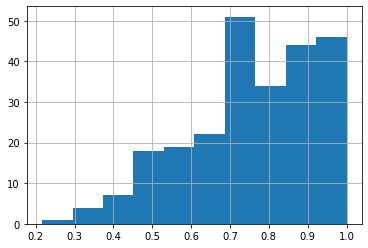

$$$  246   200
total positive  200
tp tn fp fn 0   0   0   0
year  1978 positive  0
actual len  5840
len of xtest  272
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  218
year   1979
[1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

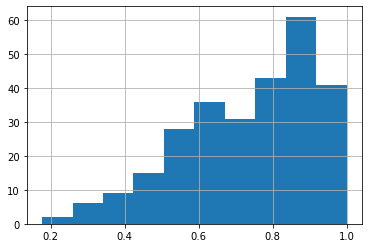

$$$  272   206
total positive  206
tp tn fp fn 0   0   0   0
year  1979 positive  0
actual len  6110
len of xtest  275
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1980
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

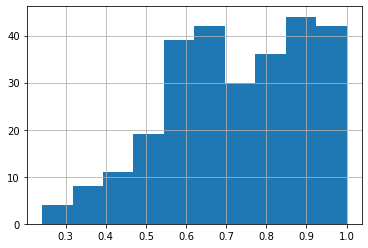

$$$  275   205
total positive  205
tp tn fp fn 0   0   0   0
year  1980 positive  0
actual len  6410
len of xtest  299
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1981
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

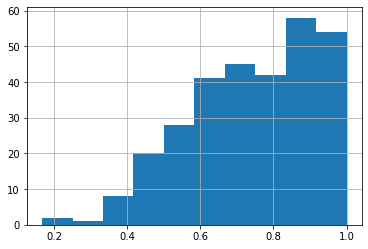

$$$  299   232
total positive  232
tp tn fp fn 0   0   0   0
year  1981 positive  0
actual len  6647
len of xtest  306
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1982
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

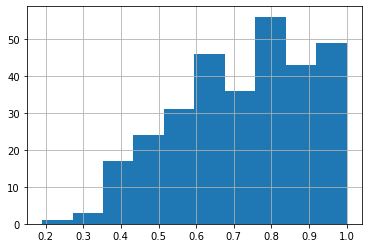

$$$  306   229
total positive  229
tp tn fp fn 0   0   0   0
year  1982 positive  0
actual len  6902
len of xtest  319
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1983
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

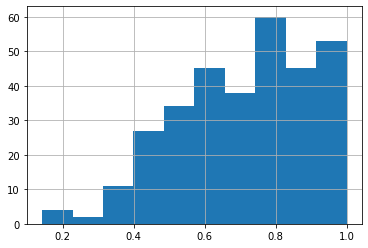

$$$  319   227
total positive  227
tp tn fp fn 0   0   0   0
year  1983 positive  0
actual len  7233
len of xtest  338
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1984
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

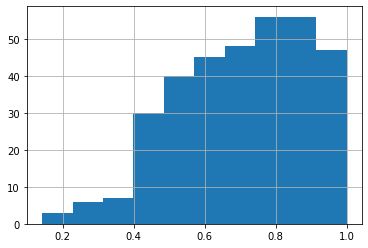

$$$  338   240
total positive  240
tp tn fp fn 0   0   0   0
year  1984 positive  0
actual len  7596
len of xtest  370
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1985
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

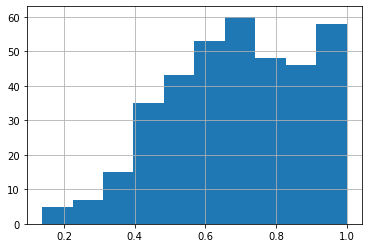

$$$  370   251
total positive  251
tp tn fp fn 0   0   0   0
year  1985 positive  0
actual len  7987
len of xtest  399
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1986
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

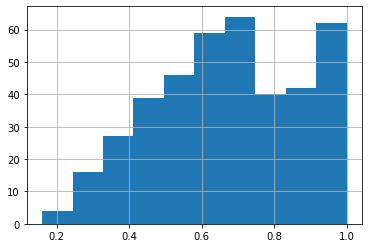

$$$  399   263
total positive  263
tp tn fp fn 0   0   0   0
year  1986 positive  0
actual len  8301
len of xtest  425
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1987
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

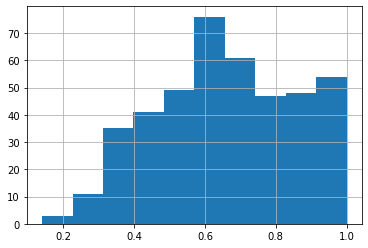

$$$  425   265
total positive  265
tp tn fp fn 0   0   0   0
year  1987 positive  0
actual len  8743
len of xtest  443
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1988
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

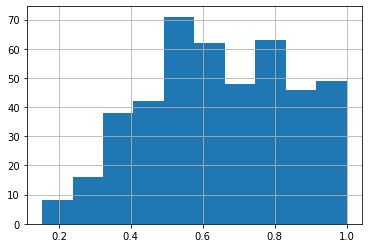

$$$  443   253
total positive  253
tp tn fp fn 0   0   0   0
year  1988 positive  0
actual len  9089
len of xtest  463
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1989
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

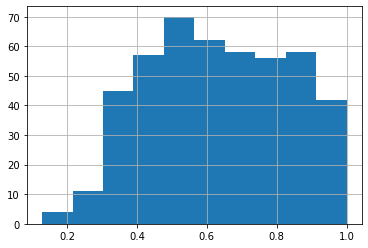

$$$  463   251
total positive  251
tp tn fp fn 0   0   0   0
year  1989 positive  0
actual len  9467
len of xtest  490
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1990
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 20

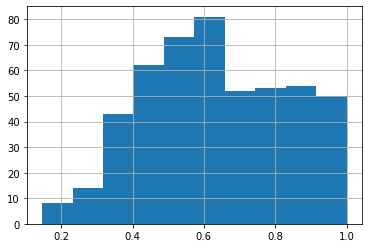

$$$  490   269
total positive  269
tp tn fp fn 0   0   0   0
year  1990 positive  0
actual len  9825
len of xtest  542
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  217
year   1991
[1979 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 20

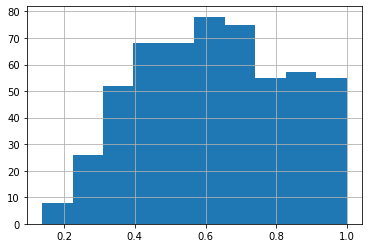

$$$  542   287
total positive  287
tp tn fp fn 0   0   0   0
year  1991 positive  0
actual len  10202
len of xtest  569
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  217
year   1992
[1979 1991 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2

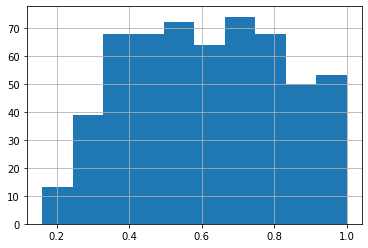

$$$  569   294
total positive  294
tp tn fp fn 0   0   0   0
year  1992 positive  0
actual len  10609
len of xtest  599
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  217
year   1993
[1979 1991 1992 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2

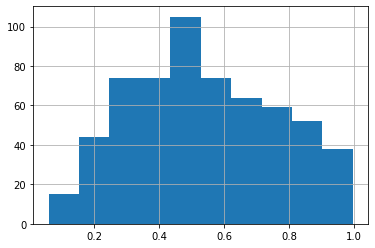

$$$  599   228
total positive  228
tp tn fp fn 1   0   0   0
year  1993 positive  1
actual len  10974
len of xtest  657
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  218
year   1994
[1979 1991 1992 1993 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2

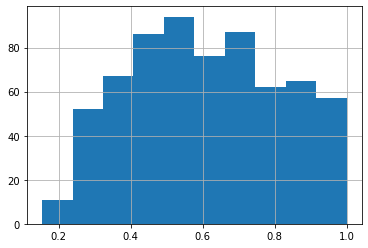

$$$  657   328
total positive  328
tp tn fp fn 0   0   0   0
year  1994 positive  0
actual len  11393
len of xtest  730
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1995
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2

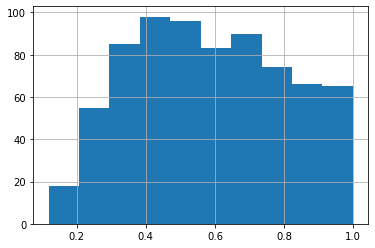

$$$  730   339
total positive  339
tp tn fp fn 0   0   0   0
year  1995 positive  0
actual len  11780
len of xtest  754
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  217
year   1996
[1979 1991 1992 1993 1994 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2

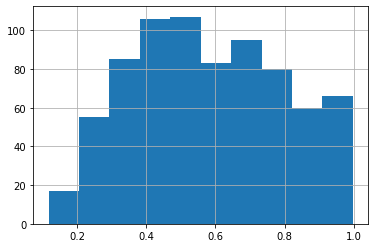

$$$  754   341
total positive  341
tp tn fp fn 1   0   0   0
year  1996 positive  1
actual len  12157
len of xtest  793
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   1997
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2

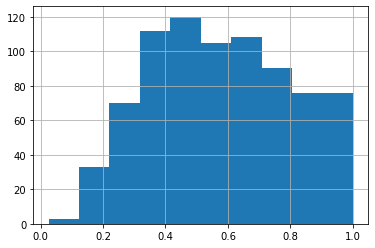

$$$  793   355
total positive  355
tp tn fp fn 0   0   0   0
year  1997 positive  0
actual len  12606
len of xtest  819
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  213
year   1998
[1979 1991 1992 1993 1994 1996 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2

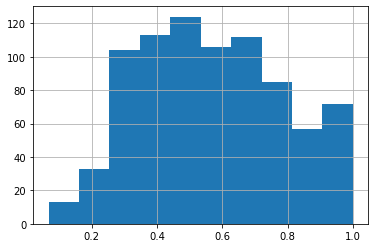

$$$  819   354
total positive  354
tp tn fp fn 2   0   0   1
year  1998 positive  3
actual len  13116
len of xtest  846
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  215
year   1999
[1979 1991 1992 1993 1994 1996 1998 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2

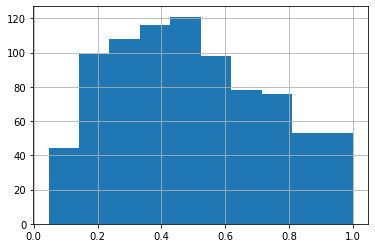

$$$  846   273
total positive  273
tp tn fp fn 0   1   0   1
year  1999 positive  1
actual len  13664
len of xtest  879
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  213
year   2000
[1979 1991 1992 1993 1994 1996 1998 1999 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2

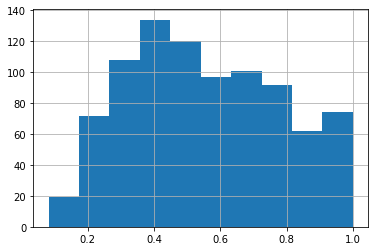

$$$  879   359
total positive  359
tp tn fp fn 2   0   1   1
year  2000 positive  3
actual len  14240
len of xtest  891
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   2001
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2

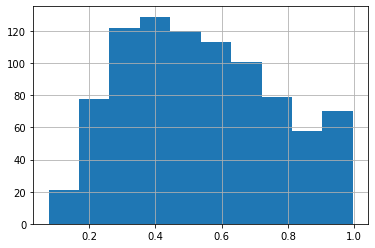

$$$  891   341
total positive  341
tp tn fp fn 0   0   0   0
year  2001 positive  0
actual len  14757
len of xtest  916
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   2002
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2

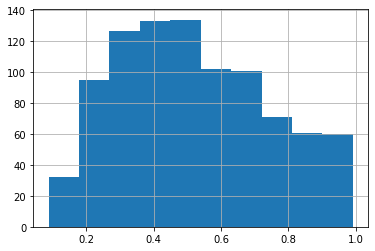

$$$  916   319
total positive  319
tp tn fp fn 0   0   0   0
year  2002 positive  0
actual len  15262
len of xtest  919
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  217
year   2003
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2

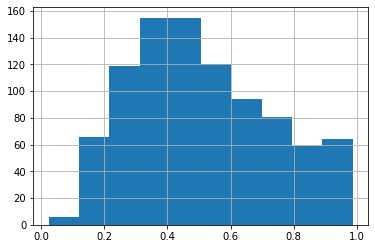

$$$  919   299
total positive  299
tp tn fp fn 1   0   0   0
year  2003 positive  1
actual len  15787
len of xtest  948
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   2004
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2

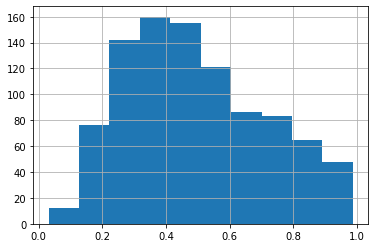

$$$  948   288
total positive  288
tp tn fp fn 0   0   0   0
year  2004 positive  0
actual len  16382
len of xtest  953
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  219
year   2005
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2

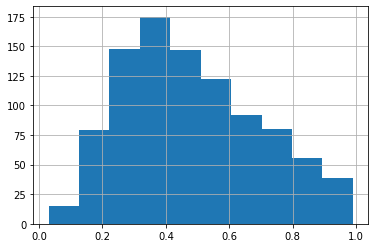

$$$  953   273
total positive  273
tp tn fp fn 0   0   0   0
year  2005 positive  0
actual len  17084
len of xtest  966
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  218
year   2006
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2

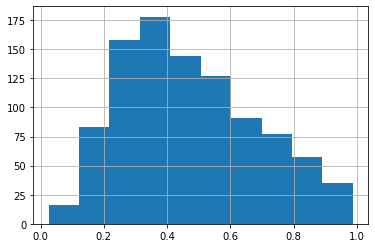

$$$  966   261
total positive  261
tp tn fp fn 1   0   0   0
year  2006 positive  1
actual len  17653
len of xtest  986
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  213
year   2007
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2

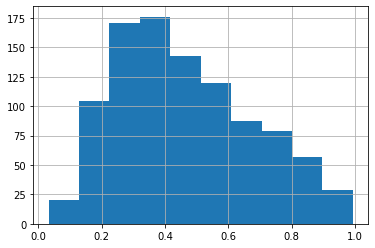

$$$  986   262
total positive  262
tp tn fp fn 3   0   1   0
year  2007 positive  3
actual len  18303
len of xtest  1001
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  211
year   2008
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 

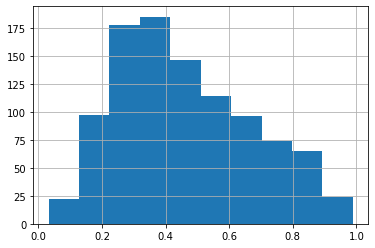

$$$  1001   266
total positive  266
tp tn fp fn 4   0   2   0
year  2008 positive  4
actual len  18833
len of xtest  1038
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  207
year   2009
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2010
 2011 2012 2013 2014 2015 2016 2017 2018

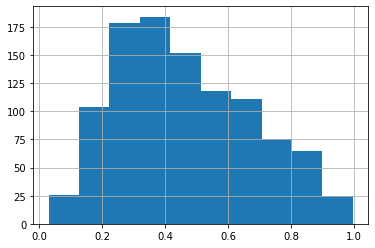

$$$  1038   288
total positive  288
tp tn fp fn 5   3   0   1
year  2009 positive  6
actual len  19499
len of xtest  1047
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  203
year   2010
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2011 2012 2013 2014 2015 2016 2017 2018

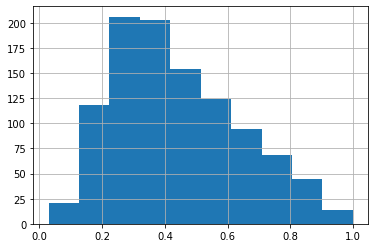

$$$  1047   230
total positive  230
tp tn fp fn 5   2   0   2
year  2010 positive  7
actual len  20126
len of xtest  1063
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  195
year   2011
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2012 2013 2014 2015 2016 2017 2018

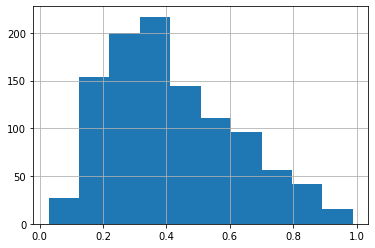

$$$  1063   213
total positive  213
tp tn fp fn 7   1   2   5
year  2011 positive  12
actual len  20856
len of xtest  1102
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  193
year   2012
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2013 2014 2015 2016 2017 201

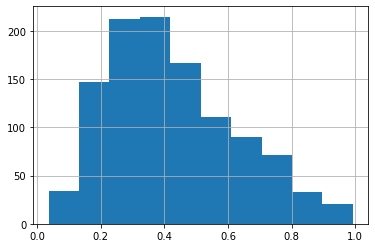

$$$  1102   227
total positive  227
tp tn fp fn 6   6   1   7
year  2012 positive  13
actual len  21671
len of xtest  1143
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  194
year   2013
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2014 2015 2016 2017 201

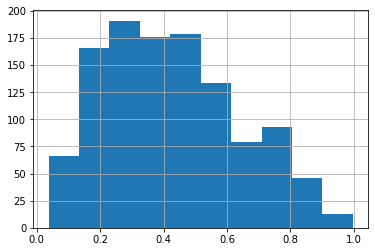

$$$  1143   246
total positive  246
tp tn fp fn 8   4   2   3
year  2013 positive  11
actual len  22577
len of xtest  1179
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  202
year   2014
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2015 2016 2017 201

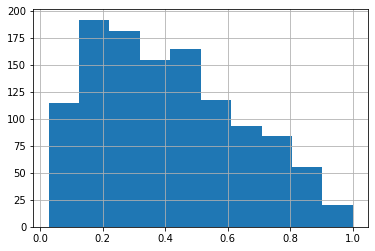

$$$  1179   265
total positive  265
tp tn fp fn 4   3   2   4
year  2014 positive  8
actual len  23437
len of xtest  1223
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  213
year   2015
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2016 2017 2018

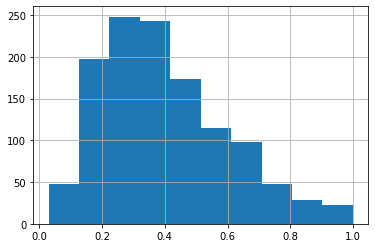

$$$  1223   207
total positive  207
tp tn fp fn 1   0   0   2
year  2015 positive  3
actual len  24395
len of xtest  1249
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  211
year   2016
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2017 2018

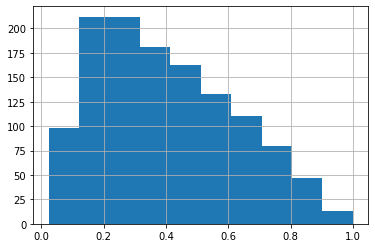

$$$  1249   259
total positive  259
tp tn fp fn 3   3   0   1
year  2016 positive  4
actual len  25382
len of xtest  1268
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  207
year   2017
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2018

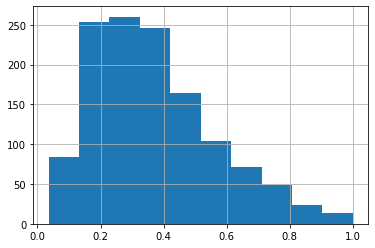

$$$  1268   172
total positive  172
tp tn fp fn 3   1   0   3
year  2017 positive  6
actual len  26313
len of xtest  1292
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  203
year   2018
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017

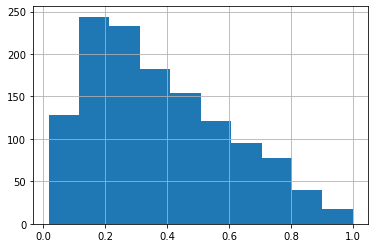

$$$  1292   235
total positive  235
tp tn fp fn 3   3   0   3
year  2018 positive  6
actual len  27361
len of xtest  1343
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  209
year   2019
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017

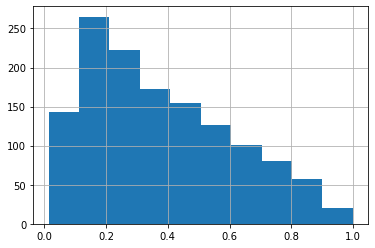

$$$  1343   265
total positive  265
tp tn fp fn 0   1   0   2
year  2019 positive  2
actual len  28712
len of xtest  1385
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc        float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
rage                         float64
dtype: object
hdhdhd before  223
len of xtrain  215
year   2020
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017

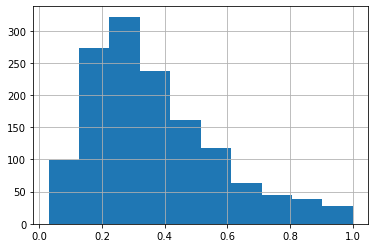

$$$  1385   186
total positive  186
tp tn fp fn 0   0   0   2
year  2020 positive  2
total pos  98  true pos  60  total false pos  262.5813953488372  mean cv  0.7368530758647036


In [3]:
##logistic regression: unified model for all
def recall2(pred,th, yr):
    data = pd.read_csv("data_84.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]
    ll = 350
    tot = 0
    ress = pd.merge(data,pred,on='cluster', how = 'inner')
    
    tp,tn,fp, fn = 0,0,0,0
    pred = pred.sort_values(by=['pred_log'], ascending = False)
    res = pred.head(ll)
    for ind in res.index:
        cl = res['cluster'][ind]
        dd = data[data['cluster'] == cl]
        if len(dd) != 0:
            dd = dd.to_numpy()
            cls = dd[0][dd.shape[1] - 1]
            if cls == 1:
                tp += 1
            else:
                fp += 1
        else:
            fp += 1
       
    pred = pred[pred['pred_log'] >= th]
    print("total positive ", ll)
    print("tp fp",tp," ",fp)
    total_pos = len(ress[ress['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    return total_pos,tp,ll - tp

def recall(pred,th, yr):
    data = pd.read_csv("data_84.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]

    tot = 0
    res = pd.merge(data,pred,on='cluster', how = 'inner')
    tp,tn,fp, fn = 0,0,0,0
    for ind in res.index:
        if res['class'][ind] == 1 and res['pred_log'][ind] >= th:
            tp += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] < th:
            tn += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] >= th:
            fp += 1
        elif res['class'][ind] == 1 and res['pred_log'][ind] < th:
            fn += 1
    pred = pred[pred['pred_log'] >= th]
    print("total positive ", len(pred))
    print("tp tn fp fn",tp," ",tn," ",fp," ",fn)
    total_pos = len(res[res['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    return total_pos,tp,len(pred[pred['pred_log'] >= th]) - tp


def train(x_train):
    
    
  
    y_train = x_train['class']
    
    x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    x_train[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])
    
    
    
    '''x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_train = x_train.drop(['cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    #x_train = x_train.drop(['pct_of_biggest_anc_new','pct_of_secbiggest_anc_new','animal','pct_is_newish'], axis = 1)
    x_train = x_train.drop(['pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','class'], axis = 1)
    '''
    
    y_train = np.array(y_train)
 
    model = LogisticRegression(random_state=0, C = 10).fit(x_train,y_train) ##logistioc
    
    '''crossvalidation2(x_train, y_train)
    print(model.intercept_, model.coef_, model.score(x_train, y_train))'''
    scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
    print("cv score ", scores.mean())
    return model,scores.mean()
    
tot,tp,total_fp = 0,0,0
yr = 1978
CV = 0
while yr <= 2020:
    
    x_train = pd.read_csv("data_84.csv")
    x_test = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_direct/features_prediction_"+str(yr)+".csv")
    print("actual len ",len(x_test))
    x_test = x_test.dropna(axis=0)
    
    x_test = x_test[x_test['n'] > 100]
    
   
    #x_test = x_test[x_test['n_biggest_anc'] >= 500]
    x_test = x_test[x_test['rcr_hi'] >= 2.00]
    x_test = x_test[x_test['cited_by_clin'] >= 0.080]
    #x_test = x_test[x_test['is_clinical'] >= 0.010] ##this one
    x_test = x_test[x_test['animal'] >= 0.01]

    x_test = x_test[x_test['molecular_cellular'] >= 0.020] ##this one, with C = 1
    #x_test = x_test[x_test['nih'] >= 0.020]
    x_test = x_test[x_test['human'] >= 0.20]
    #x_test = x_test[x_test['rage'] >= 5]
    #x_test = x_test[x_test['pct_is_new'] >= 0.09]
    print("len of xtest ",len(x_test))
       
    copy_test = x_test.copy()
    #print(x_test.tail(10))
    
    #x_test = x_test[x_test['is_research_article'] > 0.75]
    x_test = x_test.drop(['prediction','cluster','year','n',
                               'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                               'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                               ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                               ], axis = 1)
    
    x_test[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_test[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])
    
    print(x_test.dtypes)
    '''x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_test = x_test.drop(['cluster','year','n','pct_is_newish','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)
    x_test = x_test.drop(['prediction','pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low'], axis=1)
    '''
    
    
    print("hdhdhd before ",len(x_train))
    x_train = x_train[x_train['year'] != yr]
    x_train = x_train[x_train['n'] > 100]

    
    #x_train = x_train[x_train['is_research_article'] > 0.75]
    print('len of xtrain ', len(x_train))
    print("year  ",yr)
    print(x_train['year'].unique())

    model,cv = train(x_train)
    CV += cv
    pred = model.predict(x_test)
    print(pred.shape)
    #print(np.sum(pred))
    print("no of positive ",np.count_nonzero(pred == 1))
    

    
    predy = model.predict_proba(x_test)
    pred_test = []
    for i in range(predy.shape[0]):
        if predy[i][0] >= predy[i][1]:
            #pred_test.append(0.00)
            pred_test.append(predy[i][1])
        else:
            pred_test.append(predy[i][1])
    
    predy = pd.DataFrame(predy, columns = ['col_0','col_1'])
    predy = predy[predy['col_1'] >= 0.60]
    #print("len of df ", len(df))
    print("len of predy ", len(predy))
    
    
    
    copy_test['pred_log'] = pred_test
    copy_test['pred_log'].hist()
    plt.show()
    
    
    print("$$$ ",len(copy_test)," ",len(copy_test[copy_test['pred_log'] >= 0.60]))
    a, b,c = recall(copy_test,0.60, yr)
    tot += a
    tp += b
    total_fp += c
    yr += 1
print("total pos ",tot," true pos ", tp," total false pos ",total_fp/43," mean cv ",CV/43)

actual len  8714
len of xtest  4303
hdhdhd before  223
len of xtrain  219
year   1978
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(4303,)
no of positive  1619
len of predy  684


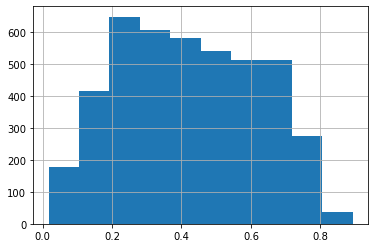

$$$  4303   684
total positive  684
tp tn fp fn 0   0   0   0
year  1978 positive  0
actual len  9064
len of xtest  4522
hdhdhd before  223
len of xtrain  218
year   1979
[1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7723212898212898
(4522,)
no of positive  1510
len of predy  477


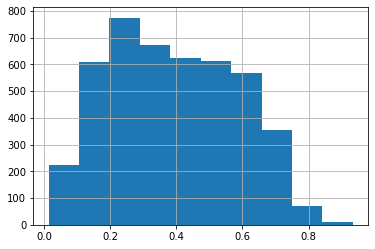

$$$  4522   477
total positive  477
tp tn fp fn 0   0   0   1
year  1979 positive  1
actual len  9441
len of xtest  4677
hdhdhd before  223
len of xtrain  219
year   1980
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(4677,)
no of positive  1765
len of predy  685


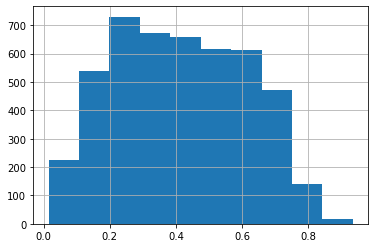

$$$  4677   685
total positive  685
tp tn fp fn 0   0   0   0
year  1980 positive  0
actual len  9864
len of xtest  4855
hdhdhd before  223
len of xtrain  219
year   1981
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(4855,)
no of positive  1794
len of predy  811


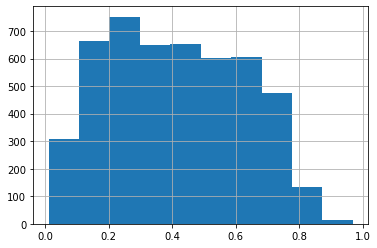

$$$  4855   811
total positive  811
tp tn fp fn 0   0   0   0
year  1981 positive  0
actual len  10210
len of xtest  5115
hdhdhd before  223
len of xtrain  219
year   1982
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(5115,)
no of positive  1957
len of predy  891


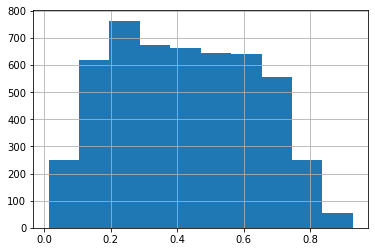

$$$  5115   891
total positive  891
tp tn fp fn 0   0   0   0
year  1982 positive  0
actual len  10637
len of xtest  5290
hdhdhd before  223
len of xtrain  219
year   1983
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(5290,)
no of positive  1951
len of predy  840


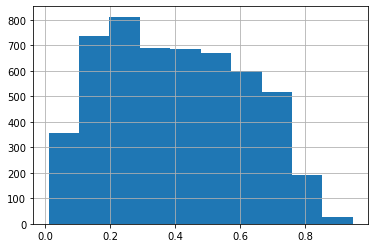

$$$  5290   840
total positive  840
tp tn fp fn 0   0   0   0
year  1983 positive  0
actual len  11077
len of xtest  5538
hdhdhd before  223
len of xtrain  219
year   1984
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(5538,)
no of positive  1946
len of predy  732


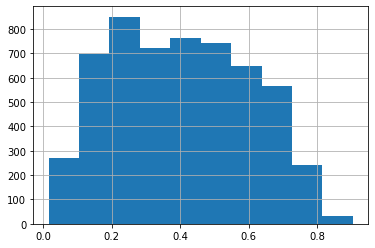

$$$  5538   732
total positive  732
tp tn fp fn 0   0   0   0
year  1984 positive  0
actual len  11539
len of xtest  5729
hdhdhd before  223
len of xtrain  219
year   1985
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(5729,)
no of positive  1890
len of predy  704


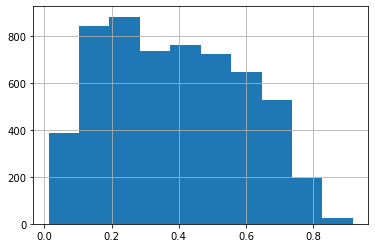

$$$  5729   704
total positive  704
tp tn fp fn 0   0   0   0
year  1985 positive  0
actual len  12054
len of xtest  6003
hdhdhd before  223
len of xtrain  219
year   1986
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(6003,)
no of positive  1720
len of predy  550


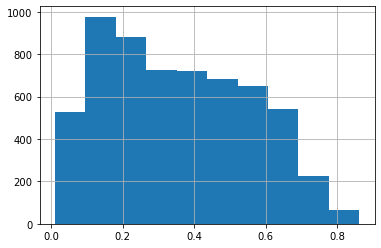

$$$  6003   550
total positive  550
tp tn fp fn 0   0   0   0
year  1986 positive  0
actual len  12580
len of xtest  6317
hdhdhd before  223
len of xtrain  219
year   1987
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(6317,)
no of positive  1554
len of predy  328


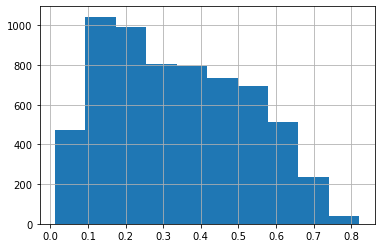

$$$  6317   328
total positive  328
tp tn fp fn 0   0   0   0
year  1987 positive  0
actual len  13150
len of xtest  6609
hdhdhd before  223
len of xtrain  219
year   1988
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(6609,)
no of positive  1622
len of predy  353


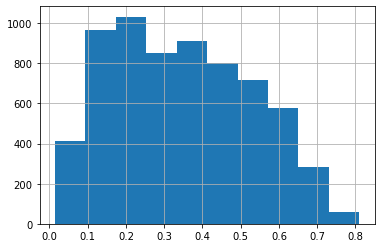

$$$  6609   353
total positive  353
tp tn fp fn 0   0   0   0
year  1988 positive  0
actual len  13783
len of xtest  6819
hdhdhd before  223
len of xtrain  219
year   1989
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(6819,)
no of positive  2162
len of predy  763


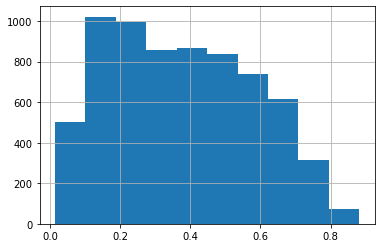

$$$  6819   763
total positive  763
tp tn fp fn 0   0   0   0
year  1989 positive  0
actual len  14399
len of xtest  7133
hdhdhd before  223
len of xtrain  219
year   1990
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(7133,)
no of positive  2437
len of predy  983


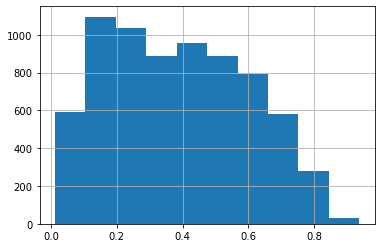

$$$  7133   983
total positive  983
tp tn fp fn 0   0   0   0
year  1990 positive  0
actual len  15057
len of xtest  7484
hdhdhd before  223
len of xtrain  217
year   1991
[1979 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.763443500943501
(7484,)
no of positive  2519
len of predy  1037


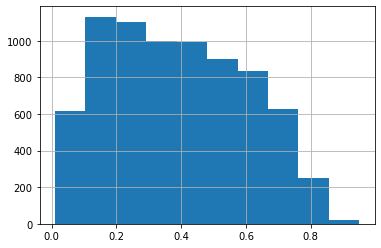

$$$  7484   1037
total positive  1037
tp tn fp fn 0   1   0   1
year  1991 positive  1
actual len  15614
len of xtest  7753
hdhdhd before  223
len of xtrain  217
year   1992
[1979 1991 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7679889554889555
(7753,)
no of positive  2258
len of predy  755


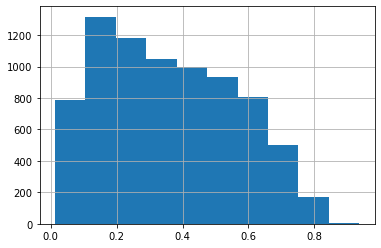

$$$  7753   755
total positive  755
tp tn fp fn 1   1   0   0
year  1992 positive  1
actual len  16286
len of xtest  7982
hdhdhd before  223
len of xtrain  217
year   1993
[1979 1991 1992 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.763443500943501
(7982,)
no of positive  3010
len of predy  1512


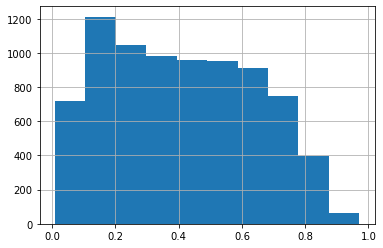

$$$  7982   1512
total positive  1512
tp tn fp fn 0   1   0   1
year  1993 positive  1
actual len  16911
len of xtest  8301
hdhdhd before  223
len of xtrain  218
year   1994
[1979 1991 1992 1993 1996 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7707883782883783
(8301,)
no of positive  2981
len of predy  1318


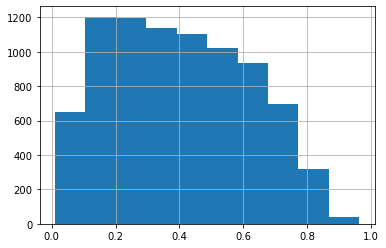

$$$  8301   1318
total positive  1318
tp tn fp fn 0   1   0   0
year  1994 positive  0
actual len  17585
len of xtest  8620
hdhdhd before  223
len of xtrain  219
year   1995
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(8620,)
no of positive  3401
len of predy  1792


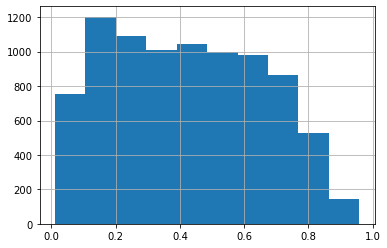

$$$  8620   1792
total positive  1792
tp tn fp fn 0   0   0   0
year  1995 positive  0
actual len  18277
len of xtest  8999
hdhdhd before  223
len of xtrain  217
year   1996
[1979 1991 1992 1993 1994 1998 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7564990564990566
(8999,)
no of positive  3245
len of predy  1545


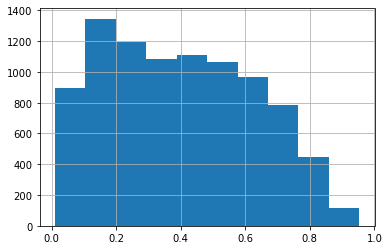

$$$  8999   1545
total positive  1545
tp tn fp fn 0   1   0   1
year  1996 positive  1
actual len  18933
len of xtest  9261
hdhdhd before  223
len of xtrain  219
year   1997
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(9261,)
no of positive  3201
len of predy  1478


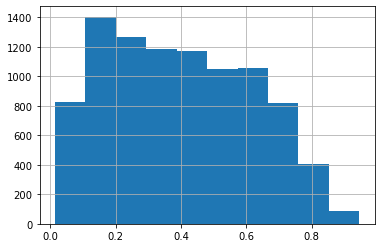

$$$  9261   1478
total positive  1478
tp tn fp fn 0   0   0   0
year  1997 positive  0
actual len  19596
len of xtest  9510
hdhdhd before  223
len of xtrain  213
year   1998
[1979 1991 1992 1993 1994 1996 1999 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7798054723054724
(9510,)
no of positive  2677
len of predy  1014


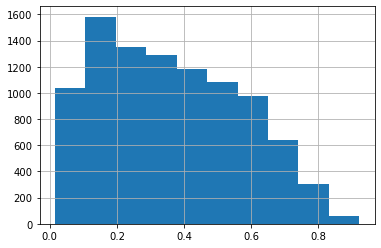

$$$  9510   1014
total positive  1014
tp tn fp fn 2   3   0   1
year  1998 positive  3
actual len  20269
len of xtest  9903
hdhdhd before  223
len of xtrain  215
year   1999
[1979 1991 1992 1993 1994 1996 1998 2000 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7677358752358752
(9903,)
no of positive  3123
len of predy  1414


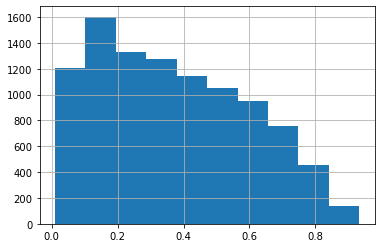

$$$  9903   1414
total positive  1414
tp tn fp fn 0   0   2   2
year  1999 positive  2
actual len  21025
len of xtest  10331
hdhdhd before  223
len of xtrain  213
year   2000
[1979 1991 1992 1993 1994 1996 1998 1999 2003 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7761341436341437
(10331,)
no of positive  3646
len of predy  1750


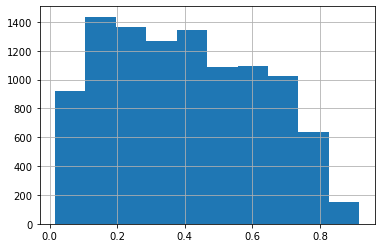

$$$  10331   1750
total positive  1750
tp tn fp fn 0   2   1   3
year  2000 positive  3
actual len  21961
len of xtest  10713
hdhdhd before  223
len of xtrain  219
year   2001
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(10713,)
no of positive  3198
len of predy  1228


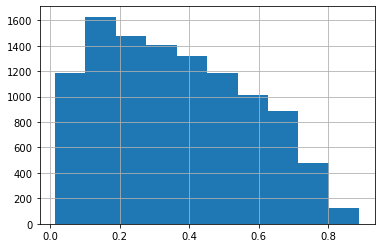

$$$  10713   1228
total positive  1228
tp tn fp fn 0   0   0   0
year  2001 positive  0
actual len  22884
len of xtest  11183
hdhdhd before  223
len of xtrain  219
year   2002
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(11183,)
no of positive  3810
len of predy  1930


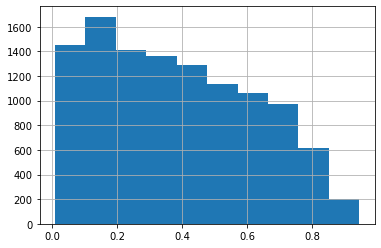

$$$  11183   1930
total positive  1930
tp tn fp fn 0   0   0   0
year  2002 positive  0
actual len  23708
len of xtest  11586
hdhdhd before  223
len of xtrain  217
year   2003
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7628590853590854
(11586,)
no of positive  3356
len of predy  1269


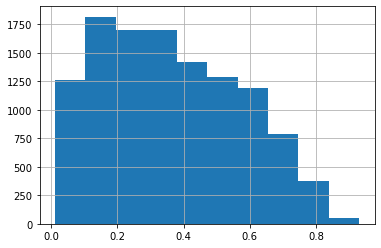

$$$  11586   1269
total positive  1269
tp tn fp fn 1   0   1   0
year  2003 positive  1
actual len  24651
len of xtest  12088
hdhdhd before  223
len of xtrain  219
year   2004
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(12088,)
no of positive  3931
len of predy  1855


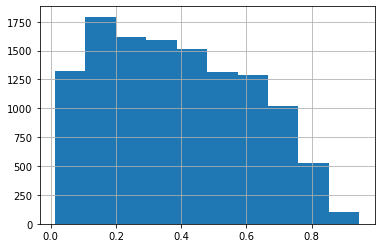

$$$  12088   1855
total positive  1855
tp tn fp fn 0   0   0   0
year  2004 positive  0
actual len  25639
len of xtest  12545
hdhdhd before  223
len of xtrain  219
year   2005
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.770358807858808
(12545,)
no of positive  4167
len of predy  2008


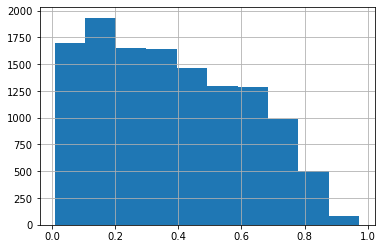

$$$  12545   2008
total positive  2008
tp tn fp fn 0   0   0   0
year  2005 positive  0
actual len  26791
len of xtest  13090
hdhdhd before  223
len of xtrain  218
year   2006
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7582628482628484
(13090,)
no of positive  4730
len of predy  2289


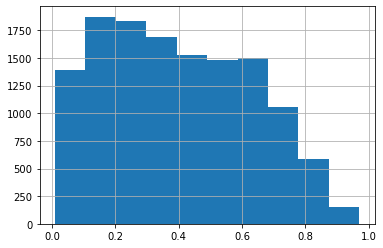

$$$  13090   2289
total positive  2289
tp tn fp fn 1   0   0   0
year  2006 positive  1
actual len  27781
len of xtest  13582
hdhdhd before  223
len of xtrain  213
year   2007
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7740345765345766
(13582,)
no of positive  4452
len of predy  1959


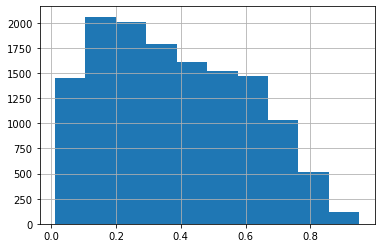

$$$  13582   1959
total positive  1959
tp tn fp fn 2   2   1   1
year  2007 positive  3
actual len  28867
len of xtest  14108
hdhdhd before  223
len of xtrain  211
year   2008
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7652444777444778
(14108,)
no of positive  4212
len of predy  1729


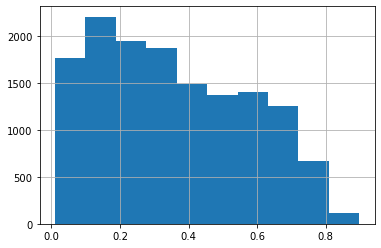

$$$  14108   1729
total positive  1729
tp tn fp fn 1   4   0   3
year  2008 positive  4
actual len  30063
len of xtest  14615
hdhdhd before  223
len of xtrain  207
year   2009
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7686383061383062
(14615,)
no of positive  5132
len of predy  2509


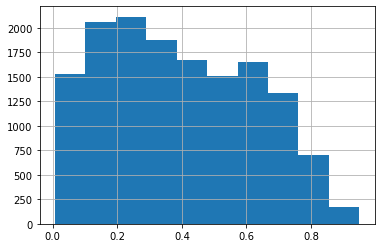

$$$  14615   2509
total positive  2509
tp tn fp fn 2   4   2   4
year  2009 positive  6
actual len  31270
len of xtest  15236
hdhdhd before  223
len of xtrain  203
year   2010
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7799514374514375
(15236,)
no of positive  4654
len of predy  1925


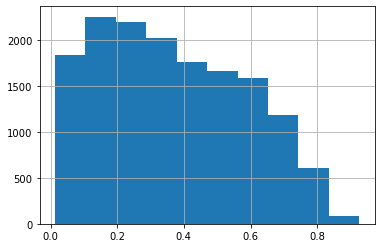

$$$  15236   1925
total positive  1925
tp tn fp fn 2   7   1   6
year  2010 positive  8
actual len  32548
len of xtest  15809
hdhdhd before  223
len of xtrain  195
year   2011
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2012 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7706604506604507
(15809,)
no of positive  5551
len of predy  2875


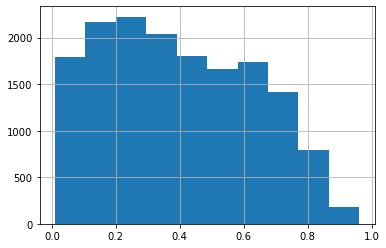

$$$  15809   2875
total positive  2875
tp tn fp fn 5   6   5   8
year  2011 positive  13
actual len  33915
len of xtest  16449
hdhdhd before  223
len of xtrain  193
year   2012
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2013 2014 2015 2016 2017 2018 2019 2020]
cv score  0.762330724830725
(16449,)
no of positive  6271
len of predy  3331


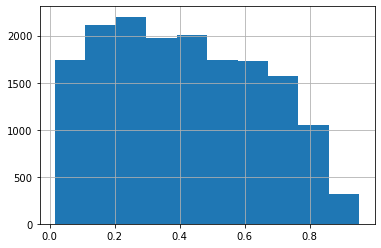

$$$  16449   3331
total positive  3331
tp tn fp fn 9   7   5   5
year  2012 positive  14
actual len  35502
len of xtest  17100
hdhdhd before  223
len of xtrain  194
year   2013
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2014 2015 2016 2017 2018 2019 2020]
cv score  0.7672261072261073
(17100,)
no of positive  5487
len of predy  1865


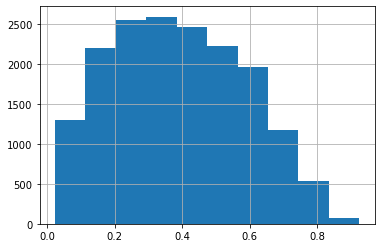

$$$  17100   1865
total positive  1865
tp tn fp fn 6   6   6   7
year  2013 positive  13
actual len  37143
len of xtest  17754
hdhdhd before  223
len of xtrain  202
year   2014
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2015 2016 2017 2018 2019 2020]
cv score  0.7744572094572095
(17754,)
no of positive  6350
len of predy  3403


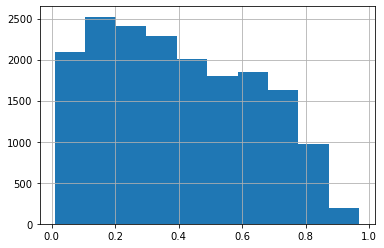

$$$  17754   3403
total positive  3403
tp tn fp fn 7   4   4   2
year  2014 positive  9
actual len  38964
len of xtest  18492
hdhdhd before  223
len of xtrain  213
year   2015
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2016 2017 2018 2019 2020]
cv score  0.7592010767010767
(18492,)
no of positive  5545
len of predy  2490


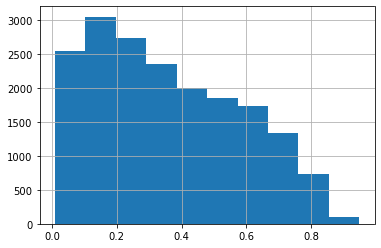

$$$  18492   2490
total positive  2490
tp tn fp fn 1   2   1   2
year  2015 positive  3
actual len  40764
len of xtest  19130
hdhdhd before  223
len of xtrain  211
year   2016
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2017 2018 2019 2020]
cv score  0.770487012987013
(19130,)
no of positive  4435
len of predy  1391


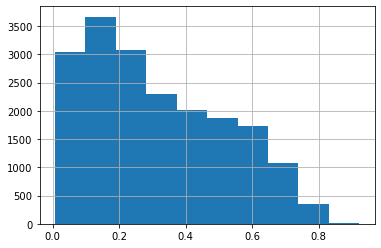

$$$  19130   1391
total positive  1391
tp tn fp fn 0   4   0   4
year  2016 positive  4
actual len  42532
len of xtest  19886
hdhdhd before  223
len of xtrain  207
year   2017
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2018 2019 2020]
cv score  0.7549314574314574
(19886,)
no of positive  6105
len of predy  3082


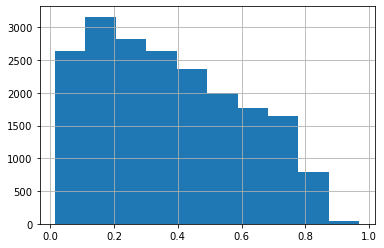

$$$  19886   3082
total positive  3082
tp tn fp fn 4   4   2   2
year  2017 positive  6
actual len  44336
len of xtest  20517
hdhdhd before  223
len of xtrain  203
year   2018
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2019 2020]
cv score  0.7876262626262626
(20517,)
no of positive  3783
len of predy  777


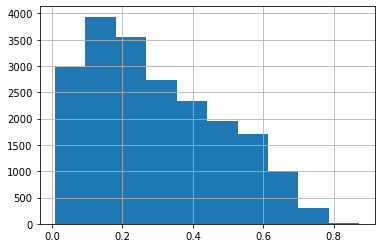

$$$  20517   777
total positive  777
tp tn fp fn 0   6   2   8
year  2018 positive  8
actual len  46374
len of xtest  21201
hdhdhd before  223
len of xtrain  209
year   2019
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2020]
cv score  0.7940981240981241
(21201,)
no of positive  6166
len of predy  2733


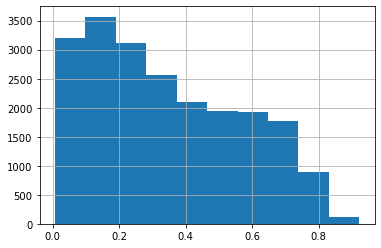

$$$  21201   2733
total positive  2733
tp tn fp fn 2   5   0   3
year  2019 positive  5
actual len  48945
len of xtest  22230
hdhdhd before  223
len of xtrain  215
year   2020
[1979 1991 1992 1993 1994 1996 1998 1999 2000 2003 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
cv score  0.7608871683871683
(22230,)
no of positive  5119
len of predy  1454


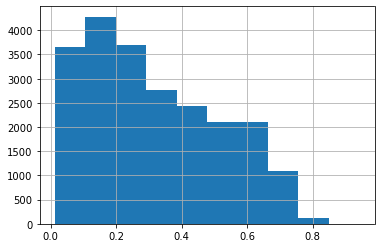

$$$  22230   1454
total positive  1454
tp tn fp fn 0   2   0   2
year  2020 positive  2
total pos  113  true pos  46  total false pos  1499.3488372093022


In [6]:
##logistic regression


def recall(pred,th, yr):
    data = pd.read_csv("data_84.csv")
    data = data[data['year'] == yr]
    data = data[data['n'] > 100]

    tot = 0
    res = pd.merge(data,pred,on='cluster', how = 'inner')
    tp,tn,fp, fn = 0,0,0,0
    for ind in res.index:
        if res['class'][ind] == 1 and res['pred_log'][ind] >= th:
            tp += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] < th:
            tn += 1
        elif res['class'][ind] == 0 and res['pred_log'][ind] >= th:
            fp += 1
        elif res['class'][ind] == 1 and res['pred_log'][ind] < th:
            fn += 1
    pred = pred[pred['pred_log'] > th]
    print("total positive ", len(pred))
    print("tp tn fp fn",tp," ",tn," ",fp," ",fn)
    total_pos = len(res[res['class'] == 1])
    print("year ",yr,"positive ",total_pos)
    
    
    return total_pos,tp,len(pred[pred['pred_log'] > th]) - tp


def train(x_train):
    
    
  
    y_train = x_train['class']
    
    '''x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    x_train[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_train[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])'''
    
    
    
    x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_train[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_train = x_train.drop(['cluster','year','n','pct_is_newish','pct_dusted_ccn','pct_dusted_rmcl','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)#$%
    #x_train = x_train.drop(['pct_of_biggest_anc_new','pct_of_secbiggest_anc_new','animal','pct_is_newish'], axis = 1)
    x_train = x_train.drop(['pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','cited_by_clin','class'], axis = 1)
    
    
    y_train = np.array(y_train)
 
    model = svm.SVC(C= 10,kernel='rbf')
    model.probability = True
    model.fit(x_train,y_train)
    
    '''crossvalidation2(x_train, y_train)
    print(model.intercept_, model.coef_, model.score(x_train, y_train))'''
    scores = cross_val_score(model, x_train, y_train, cv=20,scoring = "f1")
    print("cv score ", scores.mean())
    return model
    
tot,tp,total_fp = 0,0,0
yr = 1978

while yr <= 2020:
    
    x_train = pd.read_csv("data_84.csv")
    x_test = pd.read_csv("~/Documents/PhD/project_nobel/boty/boty_outcites/features_prediction_"+str(yr)+".csv")
    print("actual len ",len(x_test))
    x_test = x_test.dropna(axis=0)
    
    x_test = x_test[x_test['n'] > 100]
    
   
    #x_test = x_test[x_test['n_biggest_anc'] >= 500]
    #x_test = x_test[x_test['rcr_hi'] >= 2.55]
    #x_test = x_test[x_test['cited_by_clin'] >= 0.10]
    #x_test = x_test[x_test['is_clinical'] >= 0.012] ##this one
    #x_test = x_test[x_test['animal'] >= 0.02]

    #x_test = x_test[x_test['molecular_cellular'] >= 0.030] ##this one, with C = 1
    
    #x_test = x_test[x_test['human'] >= 0.25]
    #x_test = x_test[x_test['rage'] >= 5]
    #x_test = x_test[x_test['pct_is_new'] >= 0.09]
    print("len of xtest ",len(x_test))
       
    copy_test = x_test.copy()
    #print(x_test.tail(10))
    
    #x_test = x_test[x_test['is_research_article'] > 0.75]
    '''x_test = x_test.drop(['prediction','cluster','year','n',
                               'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                               'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','n_clusts_90_anc'
                               ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                               ], axis = 1)
    
    x_test[['pct_of_biggest_anc','pct_is_newish','wrcr']] = minmax_scale(x_test[[
    'pct_of_biggest_anc','pct_is_newish','wrcr']])'''
    
    
    x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']] = minmax_scale(x_test[['wrcr','rcr_hi','rcr_mid','n_biggest_anc','n_secbiggest_anc','n_clusts_90_anc','pct_of_biggest_anc_new']])
    x_test = x_test.drop(['cluster','year','n','pct_is_newish','biggest_anc','pct_in_biggest_anc','pct_of_biggest_anc','pct_of_biggest_anc_new','pct_of_biggest_anc_newish','secbiggest_anc'], axis = 1)
    x_test = x_test.drop(['prediction','pct_in_secbiggest_anc','pct_of_secbiggest_anc','pct_of_secbiggest_anc_newish','rcr_low','cited_by_clin'], axis=1)
    
    
    
    print("hdhdhd before ",len(x_train))
    x_train = x_train[x_train['year'] != yr]
    x_train = x_train[x_train['n'] > 100]

    
    #x_train = x_train[x_train['is_research_article'] > 0.75]
    print('len of xtrain ', len(x_train))
    print("year  ",yr)
    print(x_train['year'].unique())

    model = train(x_train)
    
    pred = model.predict(x_test)
    print(pred.shape)
    #print(np.sum(pred))
    print("no of positive ",np.count_nonzero(pred == 1))
    

    
    predy = model.predict_proba(x_test)
    pred_test = []
    for i in range(predy.shape[0]):
        if predy[i][0] >= predy[i][1]:
            #pred_test.append(0.00)
            pred_test.append(predy[i][1])
        else:
            pred_test.append(predy[i][1])
    
    predy = pd.DataFrame(predy, columns = ['col_0','col_1'])
    predy = predy[predy['col_1'] > 0.65]
    #print("len of df ", len(df))
    print("len of predy ", len(predy))
    
    
    
    copy_test['pred_log'] = pred_test
    copy_test['pred_log'].hist()
    plt.show()
    
    
    print("$$$ ",len(copy_test)," ",len(copy_test[copy_test['pred_log'] > 0.65]))
    a, b,c = recall(copy_test,0.65, yr)
    tot += a
    tp += b
    total_fp += c
    yr += 1
print("total pos ",tot," true pos ", tp," total false pos ",total_fp/43)